## Observations and Insights
#### Add your analysis here
---
The Capomulin regimen treatment had the most total number of mice. 
For most mice in Capomulin regiment treatment had decresing the tumor volume in 45 days, however, some mice are incrsing the tumor volume during the treatment, such as mouse ID:r157.
The mouse weight and average tumor volume are strong related in Capomulin regimen treatment, since the correlation between is 0.84.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combdf = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
combdf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Check the number of mice.
len(combdf["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup = combdf[combdf.duplicated(["Mouse ID","Timepoint"])]
dup_list = list(dup["Mouse ID"].unique())

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplic = combdf.loc[(combdf["Mouse ID"].isin(dup_list))]
duplic

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_df = combdf.loc[(~combdf["Mouse ID"].isin(dup_list))]

In [6]:
# Check the number of mice in the clean DataFrame.
len(drop_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
Tumor_Volume = drop_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean_T = Tumor_Volume.mean()
median_T = Tumor_Volume.median()
var_T = Tumor_Volume.var(ddof = 0)
std_T = Tumor_Volume.std(ddof = 0)
stderr_T = Tumor_Volume.sem()
Summary_Tumor = pd.merge(mean_T, median_T, on="Drug Regimen")
Summary_Tumor = pd.merge(Summary_Tumor, var_T, on="Drug Regimen")
Summary_Tumor = pd.merge(Summary_Tumor, std_T, on="Drug Regimen")
Summary_Tumor = pd.merge(Summary_Tumor, stderr_T, on="Drug Regimen")
Summary_Tumor = Summary_Tumor.rename(columns={"	Tumor Volume (mm3)_x":"Mean Tumor Volume","Tumor Volume (mm3)_y":"Median Tumor Volume"
                                              ,"Tumor Volume (mm3)_x":"Tumor Volume Variance","Tumor Volume (mm3)_y":"Tumor Volume Std. Dev."
                                             ,"Tumor Volume (mm3)":"Tumor Volume Std. Err."})
Summary_Tumor

,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use method to produce everything with a single groupby function
group = drop_df.groupby("Drug Regimen")
summary2 = group["Tumor Volume (mm3)"].aggregate([np.mean,np.median,np.var,np.std,st.sem])
summary2

C:\Users\kaoka\anaconda3\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\kaoka\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\kaoka\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

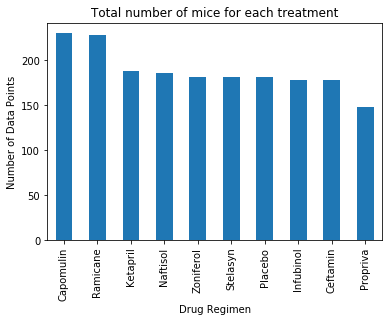

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
total = drop_df["Drug Regimen"].value_counts()
total.plot(kind = "bar")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.title("Total number of mice for each treatment")
plt.show()

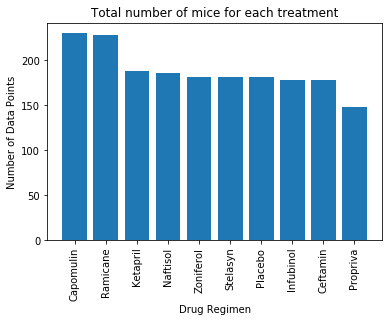

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(total))
plt.bar(x_axis, total)
plt.xticks(x_axis, total.index, rotation = "vertical")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.title("Total number of mice for each treatment")
plt.show()

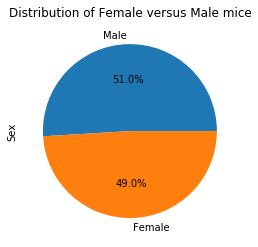

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = drop_df["Sex"].value_counts()
gender.plot(kind = "pie",labels = gender.index, autopct = "%1.1f%%")
plt.title("Distribution of Female versus Male mice")
plt.show()

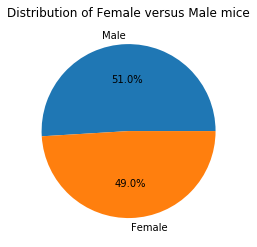

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels = gender.index, autopct = "%1.1f%%")
plt.title("Distribution of Female versus Male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
gre_timepoint = drop_df.sort_values("Timepoint", ascending = False)
drop_gre = gre_timepoint.drop_duplicates("Mouse ID").sort_values("Mouse ID")
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drop_gre = drop_gre.reset_index().drop(columns="index")
drop_gre

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_TV = drop_gre.loc[(drop_gre["Drug Regimen"]==drug)]["Tumor Volume (mm3)"]
    # add subset to tumor volume data list
    tumor_vol_list.append(drug_TV)
    
    # Determine outliers using upper and lower bounds
    qu = drug_TV.quantile([.25,.5,.75])
    Q1 = qu[.25]
    Q3 = qu[.75]
    IQR = Q3 - Q1
    lower = Q1-IQR*1.5
    upper = Q3+IQR*1.5
    outliers = drug_TV.loc[(drug_TV < lower) | (drug_TV > upper)]
    print(f"{drug}'s potential outliers:{outliers}")

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


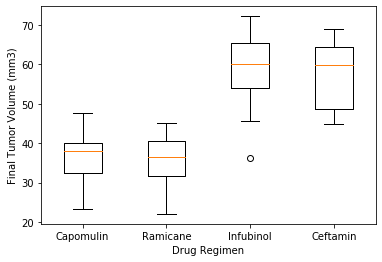

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
pos = np.array(range(len(tumor_vol_list))) + 1
bp = ax.boxplot(tumor_vol_list,positions=pos)
plt.xticks(pos,treatment_list)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

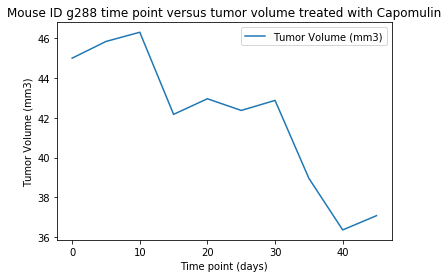

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = combdf.loc[(combdf["Drug Regimen"]=="Capomulin")]
TvsTV = Capomulin.loc[(Capomulin["Mouse ID"] == "g288")][["Timepoint","Tumor Volume (mm3)"]]

TvsTV.sort_values("Timepoint").set_index("Timepoint").plot(kind="line")
plt.title("Mouse ID g288 time point versus tumor volume treated with Capomulin")
plt.xlabel("Time point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

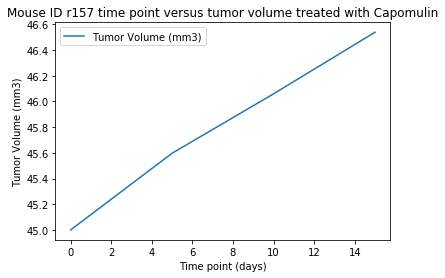

In [19]:
Capomulin = combdf.loc[(combdf["Drug Regimen"]=="Capomulin")]
TvsTV = Capomulin.loc[(Capomulin["Mouse ID"] == "r157")][["Timepoint","Tumor Volume (mm3)"]]

TvsTV.sort_values("Timepoint").set_index("Timepoint").plot(kind="line")
plt.title("Mouse ID r157 time point versus tumor volume treated with Capomulin")
plt.xlabel("Time point (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

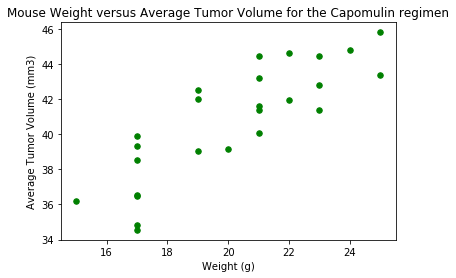

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Campomulin_group = Capomulin.groupby(["Mouse ID","Weight (g)"])
Average_Tumor = Campomulin_group["Tumor Volume (mm3)"].mean()

Average_Tumor = Average_Tumor.to_frame().reset_index("Weight (g)")
Average_Tumor = Average_Tumor.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume (mm3)"})
Average_Tumor.plot(kind="scatter",x="Weight (g)", y = "Average Tumor Volume (mm3)",s=30, color = 'g')
plt.title("Mouse Weight versus Average Tumor Volume for the Capomulin regimen")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume for the Capomulin regimen is 0.84


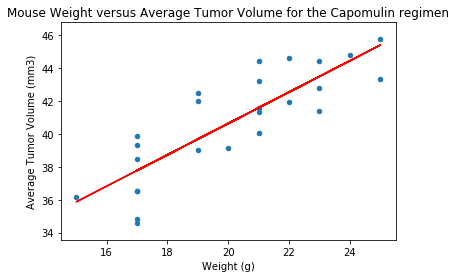

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Average_Tumor["Weight (g)"]
y_values = Average_Tumor["Average Tumor Volume (mm3)"]

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(x_values,y_values)
regress_value = x_values*slope+intercept
Average_Tumor.plot(kind="scatter",x="Weight (g)", y = "Average Tumor Volume (mm3)")
plt.plot(x_values, regress_value, "r-")
plt.title("Mouse Weight versus Average Tumor Volume for the Capomulin regimen")
plt.ylim(min(y_values)-1, max(y_values)+1)
plt.show()